In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

awards = pd.read_csv("data/cleaned_Data/cleaned_awards.csv")
player_data = pd.read_csv("data/cleaned_Data/cleaned_player.csv")
team_data = pd.read_csv("data/cleaned_Data/cleaned_team.csv")
rebounding_data = pd.read_csv("data/cleaned_Data/cleaned_rebounding.csv")

# DBSCAN

## player_data

In [4]:
player_data.select_dtypes(include=['float64', 'int64'])

,personID,draftyear,season,teamID,game_played,games_as_the_start,mins,fgm,fga,fgp,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,2003,2007,1610612737,62,5,944,107,245,0.437,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,2006,2007,1610612737,35,0,145,12,30,0.400,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,2004,2007,1610612737,81,81,2873,518,1133,0.457,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,2007,2007,1610612737,56,6,865,95,237,0.401,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,2005,2007,1610612737,35,0,402,65,180,0.361,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,1630648,2021,2021,1610612764,4,0,30,1,11,0.091,...,0.000,0.078,0.191,-0.2,0.0,-0.1,-8.6,-4.4,-13.0,-0.1
8488,1630557,2021,2021,1610612764,77,36,1801,234,514,0.455,...,0.010,0.085,0.146,1.6,0.7,2.3,-0.8,-1.5,-2.3,-0.1
8489,1628398,2017,2021,1610612764,66,66,2204,423,936,0.452,...,0.022,0.141,0.242,0.0,2.0,2.0,0.2,-0.4,-0.2,1.0
8490,203526,2013,2021,1610612764,70,19,1372,204,441,0.463,...,0.002,0.139,0.184,0.7,0.8,1.5,-2.5,-0.5,-3.0,-0.4


In [9]:
player_num_cols = player_data.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['personID', 'teamID']
player_num_cols = player_num_cols.drop(columns=columns_to_exclude,axis=1)

### PCA

We will standard scale the dataset before performing PCA.

In [10]:
columns_name = player_num_cols.columns
player_stats_numerical = player_data[columns_name]
scaler = StandardScaler()
player_stats_scaled = scaler.fit_transform(player_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(player_stats_scaled)
principalDf_player_stats = pd.DataFrame(data=principalComponents)
principalDf_player_stats

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.672355,1.919143,-2.172668,1.424548,-0.386250,-1.557440,-0.558001,0.518493,1.034742,0.872393,1.069285,-0.529165,0.279714
1,-4.292558,2.124693,-2.210512,1.277179,0.365587,-1.262501,-0.627751,0.942020,1.330222,-0.810328,1.087748,0.047708,0.536663
2,11.469243,2.866020,-3.489239,1.637805,-1.378579,1.581172,-0.073694,-1.385878,-0.301188,1.477814,-1.915162,2.572689,0.607497
3,-2.262614,-1.932332,-0.416146,1.566222,-1.293985,-0.822306,-0.996373,-0.207297,-0.325131,1.086575,0.234059,-0.201864,0.357266
4,-2.851517,-1.981929,0.261198,1.003812,0.113531,-2.223598,0.742815,-0.588422,0.198728,0.607998,-0.377405,0.850592,-0.145895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,-5.828016,-1.737403,-3.999775,-1.759689,2.447899,1.268447,2.041803,0.527670,1.663948,1.303574,-0.465467,-0.872565,-1.085719
8488,1.032472,-1.426816,1.148010,-3.718856,-0.734350,-0.134141,-0.462944,-0.064779,0.352600,-0.164082,0.746261,-0.154568,0.462648
8489,5.681881,-0.301534,-0.688965,-2.686777,0.922506,0.857799,-0.605150,1.617015,-0.011441,0.691372,-0.665803,0.662955,0.431948
8490,0.500829,-1.938444,0.837841,-0.674588,-0.061465,0.701417,-1.519396,-0.265478,-0.254493,1.013691,0.407525,-0.625881,0.413543


After performing PCA, the dimension of the player dataset is reduced to 13 columns, each represents a principal component. The new table maintains 90% of the variance in the original data. We will then take a look at the explained variance to see how much variance each principal component captures. Then we will choose accordingly in the part where we perform unsupervised learning.

We will then take a look at the explained variance to see how much variance each principal component captures. Then we will choose accordingly in the part where we perform unsupervised learning.

In [11]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.43567864 0.11724928 0.08259299 0.04416969 0.04096196 0.03655665
 0.03068917 0.02260607 0.02222157 0.02146992 0.0191298  0.01747699
 0.0155553 ]


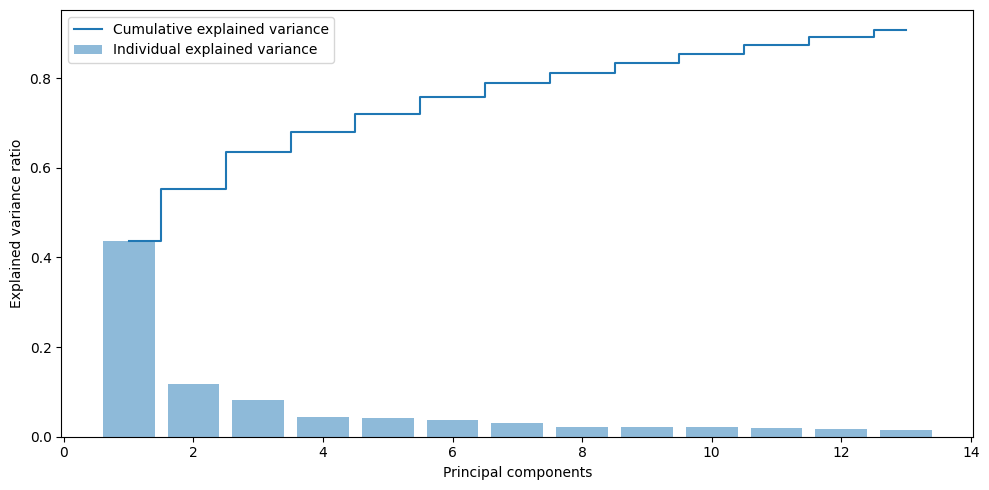

In [12]:
n_components = np.arange(len(explained_variance)) + 1

plt.figure(figsize=(10, 5))
plt.bar(n_components, explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(n_components, np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The output presents the explained variance ratio of each principal component. The first component accounts for approximately 43% of the variance, which is very influential in terms of explaining variance. And all these components will add up to 90% of the variance.

We will run DBSCAN on the PCA dataset using the first 2 PCs.

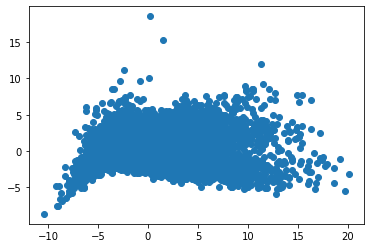

In [9]:
# Plot the data
plt1 = plt.scatter(principalDf_player_stats[0], principalDf_player_stats[1])

Estimated number of clusters: 24
Estimated number of noise points: 37


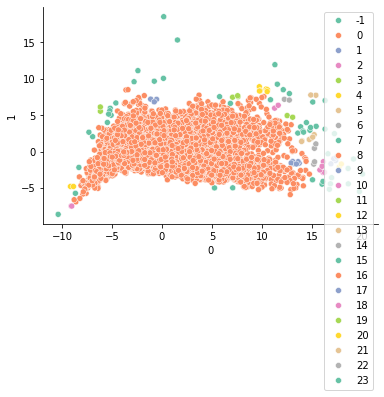

In [10]:
# Run DBSCAN
principalDF_dbscan = principalDf_player_stats[[0, 1]]
db = DBSCAN(eps = 0.7, min_samples = 2).fit(principalDF_dbscan)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

sns.scatterplot(data = principalDF_dbscan, x = principalDF_dbscan[0], y = principalDF_dbscan[1], 
                hue = labels, 
                palette = sns.color_palette("Set2",n_clusters_));
sns.despine()

In [11]:
from sklearn.metrics import silhouette_score

X = principalDF_dbscan.values

# Define parameter space
eps_values = np.arange(0.1, 1.0, 0.1)

#Since we have 8491 samples, an estimate of samples would be np.log(8491), which rougly equals to 9. 
#This is why we set the range from 6 to 13
min_samples_values = range(6, 13) 


best_score = -1
best_params = {'eps': None, 'min_samples': None}

all_scores = []

# Loop through parameter grid
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        # Skip if only one cluster or all are noise
        if len(set(labels)) - (1 if -1 in labels else 0) <= 1:
            continue
        
        # Compute the silhouette score
        score = silhouette_score(X, labels)
        all_scores.append((eps, min_samples, score))

        # Update best parameters
        if score > best_score:
            best_score = score
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples

# Convert all_scores to a DataFrame
scores_df = pd.DataFrame(all_scores, columns=['eps', 'min_samples', 'score'])

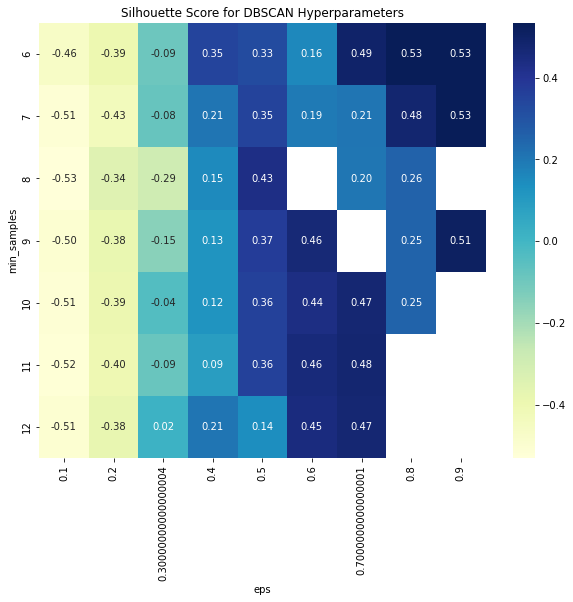

Best parameters: {'eps': 0.9, 'min_samples': 7}
Best silhouette score: 0.5335526912365348


In [12]:
pivot_df = scores_df.pivot(index='min_samples', columns='eps', values='score')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Silhouette Score for DBSCAN Hyperparameters")
plt.ylabel("min_samples")
plt.xlabel("eps")
plt.show()

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

Text(0, 0.5, 'Principal Component 2')

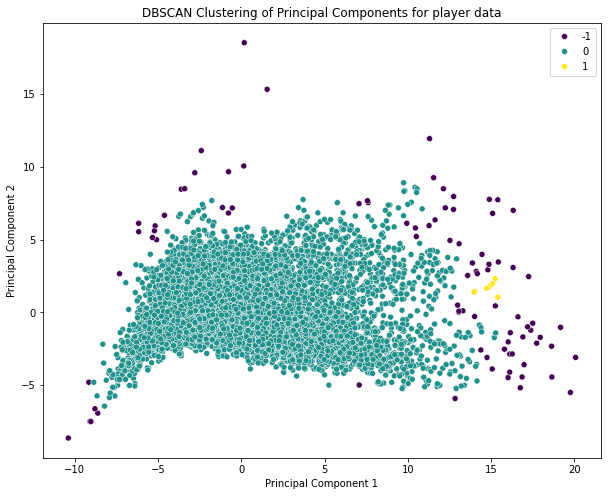

In [13]:
db_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples']).fit(X)
labels_best = db_best.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principalDF_dbscan[0], y=principalDF_dbscan[1], hue=labels_best, palette="viridis", legend='full')
plt.title("DBSCAN Clustering of Principal Components for player data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

## awards data

In [13]:
awards_num_cols = awards.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['personID']
awards_num_cols = awards_num_cols.drop(columns=columns_to_exclude)

### PCA

We will standard scale the dataset before performing PCA.

In [14]:
columns_name = awards_num_cols.columns
award_stats_numerical = awards[columns_name]
scaler = StandardScaler()
award_stats_scaled = scaler.fit_transform(award_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(award_stats_scaled)
principalDf_award_stats = pd.DataFrame(data=principalComponents)
principalDf_award_stats

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,8.440156,-0.669155,3.612062,-3.248069,0.819703,0.952777,-1.704937,1.242831,3.426065,-0.719963,-1.165370,-2.536059,1.858326,-0.930870,-2.257085,2.348368
1,3.725572,0.186682,-0.135589,-0.536459,-0.061814,-1.292529,-0.625170,-0.171352,-0.617007,0.364925,-0.018771,-0.543790,-2.115175,0.741017,-0.832511,1.059841
2,2.020551,0.310169,-0.191438,-2.272501,0.669117,1.737142,-0.594812,1.704128,5.360431,-0.867702,-0.263381,-1.300444,1.862584,-0.612081,-2.232200,2.077934
3,4.865675,0.071907,-2.306860,3.993086,-2.166265,-3.942747,4.563203,-0.361804,1.962666,-0.448569,-1.307465,-1.254408,-0.470217,0.043521,-0.803846,0.910981
4,10.786995,-1.087195,5.856774,-5.102361,1.390756,1.722062,-1.680529,0.510756,2.154512,-0.513598,-1.380130,-3.311915,0.262411,-0.453184,-0.752592,0.636620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,-0.435861,1.302131,-0.110394,-1.199087,-2.823010,0.092080,-0.096863,0.106086,0.789162,5.713875,-1.254510,0.057324,0.849346,0.701226,0.152194,-0.289529
4317,-0.435861,1.302131,-0.110394,-1.199087,-2.823010,0.092080,-0.096863,0.106086,0.789162,5.713875,-1.254510,0.057324,0.849346,0.701226,0.152194,-0.289529
4318,-0.435861,1.302131,-0.110394,-1.199087,-2.823010,0.092080,-0.096863,0.106086,0.789162,5.713875,-1.254510,0.057324,0.849346,0.701226,0.152194,-0.289529
4319,-0.542294,0.792256,0.061013,-0.769142,-2.117118,0.091081,-0.112822,0.061490,0.558826,4.321301,-0.847800,0.015060,0.741841,0.416823,0.141861,-0.299995


The awards dataset is reduced to 16 columns after PCA, each represents a principal component. We will then take a look at the explained variance to see how much variance each principal component captures. Then we will choose accordingly in the part where we perform unsupervised learning.

We will then take a look at the explained variance to see how much variance each principal component captures. Then we will choose accordingly in the part where we perform unsupervised learning.

Explained Variance: [0.17697493 0.11597585 0.0781489  0.06498761 0.05930037 0.05408957
 0.04828576 0.04410959 0.04180999 0.04050191 0.03932972 0.03875374
 0.03032152 0.02942342 0.02439936 0.02431878]


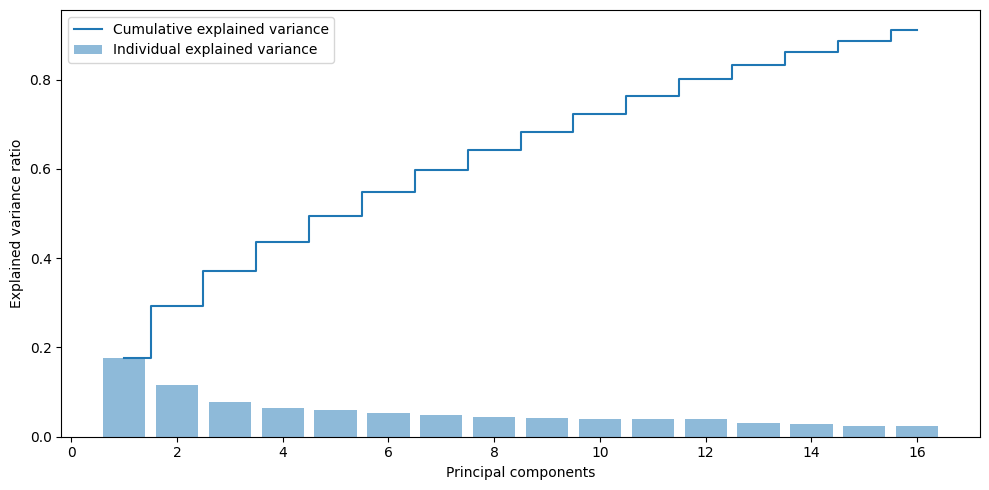

In [16]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

n_components = np.arange(len(explained_variance)) + 1

plt.figure(figsize=(10, 5))
plt.bar(n_components, explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(n_components, np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We will run DBSCAN on the PCA dataset using the first 2 PCs.

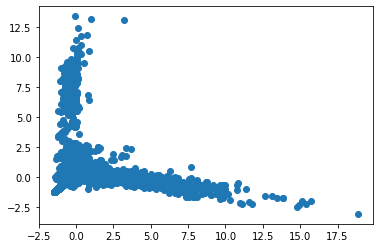

In [22]:
# Plot the data
plt1 = plt.scatter(principalDf_award_stats[0], principalDf_award_stats[1])

Estimated number of clusters: 9
Estimated number of noise points: 10


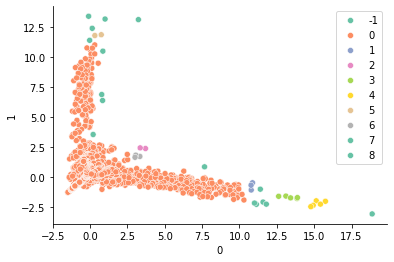

In [23]:
# Run DBSCAN
principalDF_dbscan = principalDf_award_stats[[0, 1]]
db = DBSCAN(eps = 0.5, min_samples = 2).fit(principalDF_dbscan)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

sns.scatterplot(data = principalDF_dbscan, x = principalDF_dbscan[0], y = principalDF_dbscan[1], 
                hue = labels, 
                palette = sns.color_palette("Set2",n_clusters_));
sns.despine()

In [24]:
from sklearn.metrics import silhouette_score

X = principalDF_dbscan.values

# Define parameter space
eps_values = np.arange(0.1, 1.0, 0.1)

#Since we have 8491 samples, an estimate of samples would be np.log(8491), which rougly equals to 9. 
#This is why we set the range from 6 to 13
min_samples_values = range(6, 13) 

best_score = -1
best_params = {'eps': None, 'min_samples': None}

all_scores = []

# Loop through parameter grid
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        # Skip if only one cluster or all are noise
        if len(set(labels)) - (1 if -1 in labels else 0) <= 1:
            continue
        
        # Compute the silhouette score
        score = silhouette_score(X, labels)
        all_scores.append((eps, min_samples, score))

        # Update best parameters
        if score > best_score:
            best_score = score
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples

# Convert all_scores to a DataFrame
scores_df = pd.DataFrame(all_scores, columns=['eps', 'min_samples', 'score'])

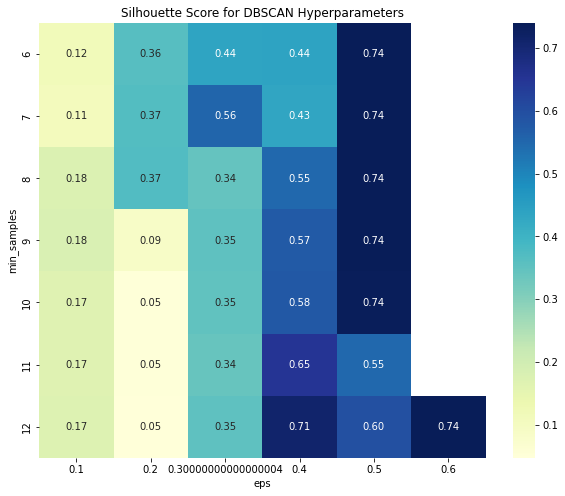

Best parameters: {'eps': 0.5, 'min_samples': 6}
Best silhouette score: 0.7403130603029755


In [25]:
pivot_df = scores_df.pivot(index='min_samples', columns='eps', values='score')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Silhouette Score for DBSCAN Hyperparameters")
plt.ylabel("min_samples")
plt.xlabel("eps")
plt.show()

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

Text(0, 0.5, 'Principal Component 2')

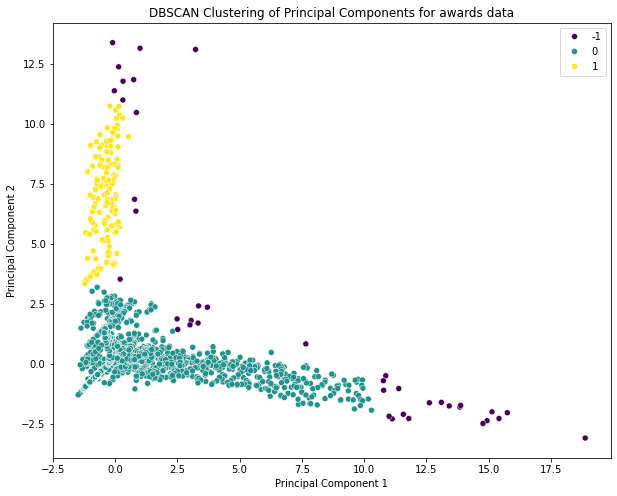

In [26]:
db_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples']).fit(X)
labels_best = db_best.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principalDF_dbscan[0], y=principalDF_dbscan[1], hue=labels_best, palette="viridis", legend='full')
plt.title("DBSCAN Clustering of Principal Components for awards data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

## team_data

In [17]:
team_num_cols = team_data.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['teamID']
team_num_cols = team_num_cols.drop(columns=columns_to_exclude,axis=1)

### PCA

In [30]:
columns_name = team_num_cols.columns
team_stats_numerical = team_data[columns_name]
scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(team_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(team_stats_scaled)
principalDf_team_stats = pd.DataFrame(data=principalComponents)
principalDf_team_stats

,0,1,2
0,0.832151,-1.244492,-0.412609
1,1.771354,-1.524464,-0.286465
2,-5.007585,-2.248026,0.181053
3,1.918419,-1.452639,-0.327394
4,1.571532,-1.846663,-0.129204
...,...,...,...
445,2.239619,2.127520,-1.154642
446,0.915859,2.007490,-1.079937
447,-1.332936,1.817541,-0.940513
448,-2.040838,2.276042,-1.161007


In [31]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.62977278 0.19123763 0.11746024]


We will now run DBSCAN on the PCA dataset using the first 2 PCs.

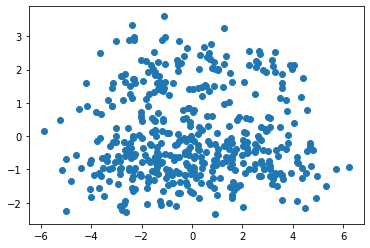

In [32]:
# Plot the data
plt1 = plt.scatter(principalDf_team_stats[0], principalDf_team_stats[1])

Estimated number of clusters: 25
Estimated number of noise points: 40


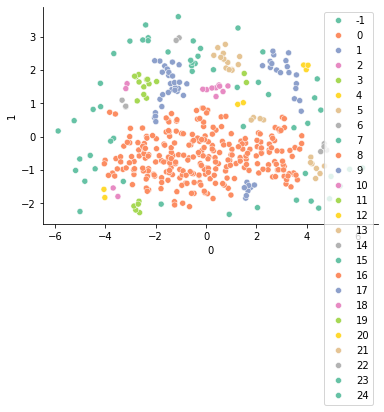

In [33]:
# Run DBSCAN
principalDF_dbscan = principalDf_team_stats[[0, 1]]
db = DBSCAN(eps = 0.35, min_samples = 2).fit(principalDF_dbscan)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

sns.scatterplot(data = principalDF_dbscan, x = principalDF_dbscan[0], y = principalDF_dbscan[1], 
                hue = labels, 
                palette = sns.color_palette("Set2",n_clusters_));
sns.despine()

In [34]:
from sklearn.metrics import silhouette_score

X = principalDF_dbscan.values

# Define parameter space
eps_values = np.arange(0.1, 1.0, 0.1)

#Since we have 8491 samples, an estimate of samples would be np.log(8491), which rougly equals to 9. 
#This is why we set the range from 6 to 13
min_samples_values = range(6, 13) 

best_score = -1
best_params = {'eps': None, 'min_samples': None}

all_scores = []

# Loop through parameter grid
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        # Skip if only one cluster or all are noise
        if len(set(labels)) - (1 if -1 in labels else 0) <= 1:
            continue
        
        # Compute the silhouette score
        score = silhouette_score(X, labels)
        all_scores.append((eps, min_samples, score))

        # Update best parameters
        if score > best_score:
            best_score = score
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples

# Convert all_scores to a DataFrame
scores_df = pd.DataFrame(all_scores, columns=['eps', 'min_samples', 'score'])

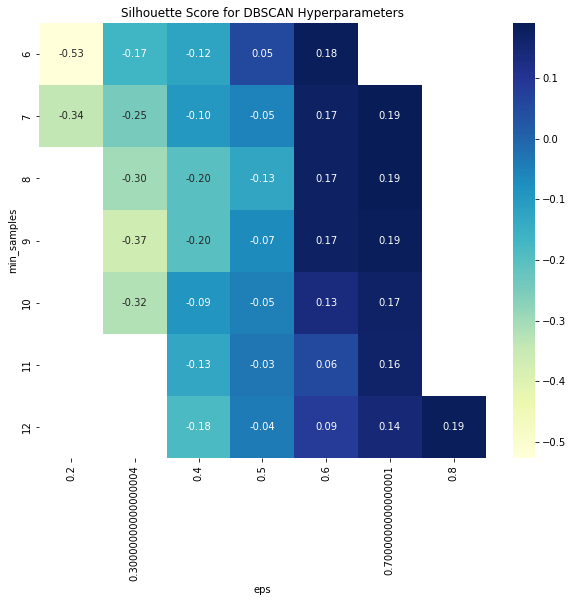

Best parameters: {'eps': 0.7000000000000001, 'min_samples': 7}
Best silhouette score: 0.19034092743094574


In [35]:
pivot_df = scores_df.pivot(index='min_samples', columns='eps', values='score')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Silhouette Score for DBSCAN Hyperparameters")
plt.ylabel("min_samples")
plt.xlabel("eps")
plt.show()

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

Text(0, 0.5, 'Principal Component 2')

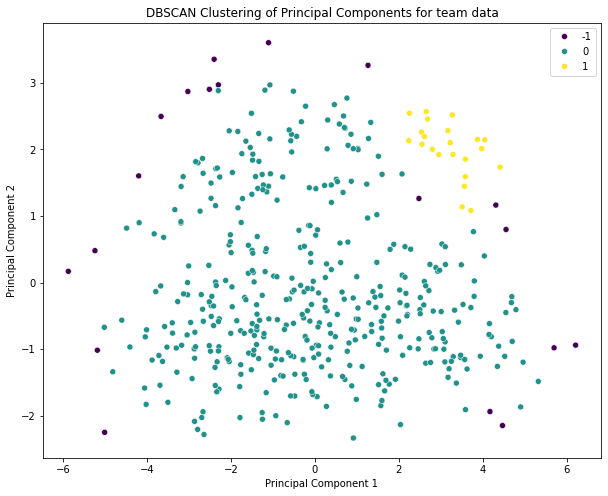

In [36]:
db_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples']).fit(X)
labels_best = db_best.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principalDF_dbscan[0], y=principalDF_dbscan[1], hue=labels_best, palette="viridis", legend='full')
plt.title("DBSCAN Clustering of Principal Components for team data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

## rebounding data

In [18]:
rebounding_num_cols = rebounding_data.select_dtypes(include=['float64', 'int64'])

### PCA

In [19]:
columns_name = rebounding_num_cols.columns
rebound_stats_numerical = rebounding_data[columns_name]
scaler = StandardScaler()
rebound_stats_scaled = scaler.fit_transform(rebound_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(rebound_stats_scaled)
principalDf_rebounding_stats = pd.DataFrame(data=principalComponents)
principalDf_rebounding_stats

,0,1,2
0,1.281017,-1.671620,-1.073836
1,1.877043,-1.783874,-0.200848
2,-0.953302,-1.747302,0.694664
3,-0.397016,-1.800918,0.993653
4,0.167926,-1.692398,-0.364150
...,...,...,...
2455,-1.337672,1.723124,0.573688
2456,0.381765,1.572668,1.341135
2457,0.419835,1.474415,2.329161
2458,0.544042,1.637624,0.605767


In [20]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.56352898 0.25003522 0.18440364]


We will now run DBSCAN on the PCA dataset using the first 2 PCs.

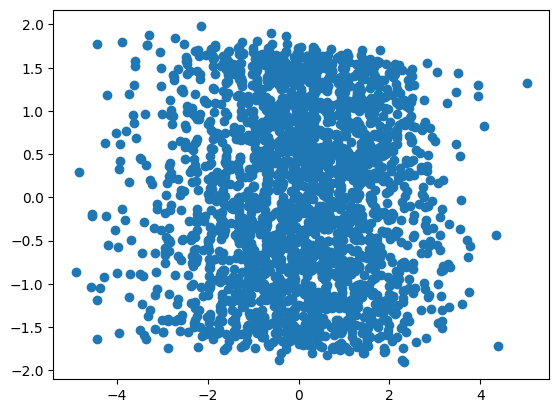

In [21]:
# Plot the data
plt1 = plt.scatter(principalDf_rebounding_stats[0], principalDf_rebounding_stats[1])

Estimated number of clusters: 21
Estimated number of noise points: 43


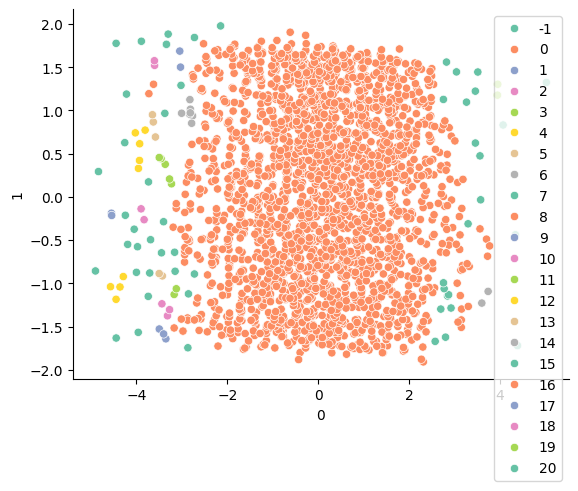

In [22]:
# Run DBSCAN
principalDF_dbscan = principalDf_rebounding_stats[[0, 1]]
db = DBSCAN(eps = 0.2, min_samples = 2).fit(principalDF_dbscan)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

sns.scatterplot(data = principalDF_dbscan, x = principalDF_dbscan[0], y = principalDF_dbscan[1], 
                hue = labels, 
                palette = sns.color_palette("Set2",n_clusters_));
sns.despine()

In [23]:
from sklearn.metrics import silhouette_score

X = principalDF_dbscan.values

# Define parameter space
eps_values = np.arange(0.1, 1.0, 0.1)

#Since we have 8491 samples, an estimate of samples would be np.log(8491), which rougly equals to 9. 
#This is why we set the range from 6 to 13
min_samples_values = range(6, 13) 

best_score = -1
best_params = {'eps': None, 'min_samples': None}

all_scores = []

# Loop through parameter grid
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        # Skip if only one cluster or all are noise
        if len(set(labels)) - (1 if -1 in labels else 0) <= 1:
            continue
        
        # Compute the silhouette score
        score = silhouette_score(X, labels)
        all_scores.append((eps, min_samples, score))

        # Update best parameters
        if score > best_score:
            best_score = score
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples

# Convert all_scores to a DataFrame
scores_df = pd.DataFrame(all_scores, columns=['eps', 'min_samples', 'score'])

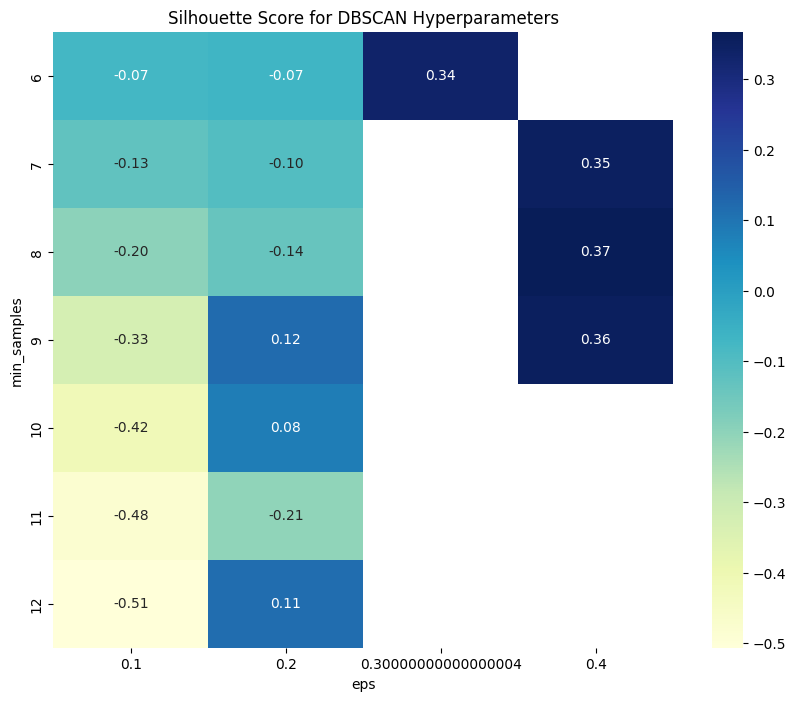

Best parameters: {'eps': 0.4, 'min_samples': 8}
Best silhouette score: 0.36695823882835166


In [24]:
pivot_df = scores_df.pivot(index='min_samples', columns='eps', values='score')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Silhouette Score for DBSCAN Hyperparameters")
plt.ylabel("min_samples")
plt.xlabel("eps")
plt.show()

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

Text(0, 0.5, 'Principal Component 2')

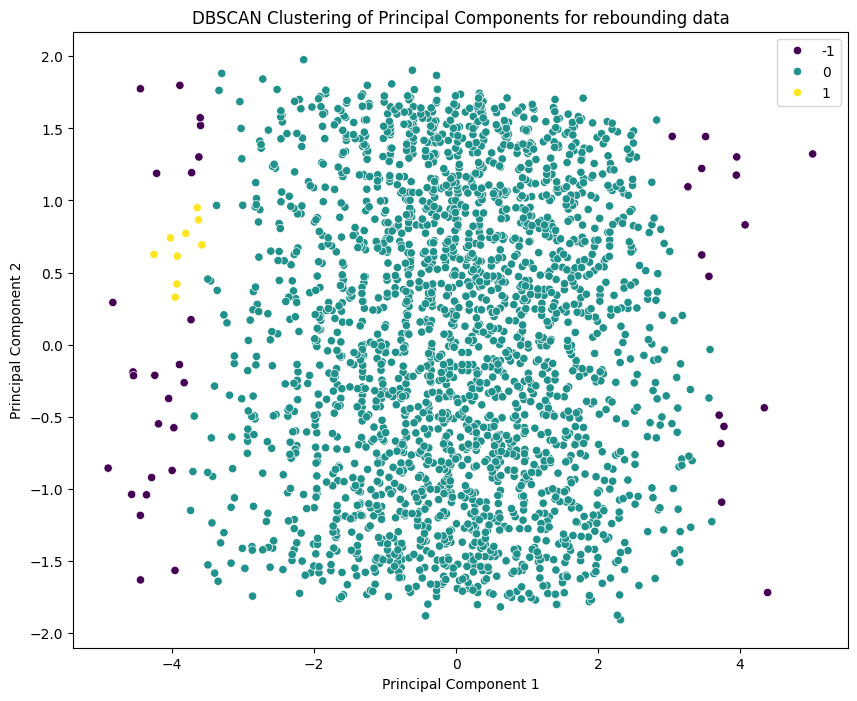

In [25]:
db_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples']).fit(X)
labels_best = db_best.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x=principalDF_dbscan[0], y=principalDF_dbscan[1], hue=labels_best, palette="viridis", legend='full')
plt.title("DBSCAN Clustering of Principal Components for rebounding data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")